1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

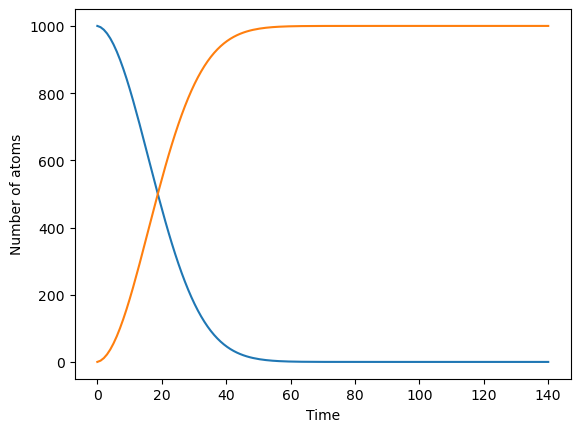

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
#%precision 4

T = 3.052*60
N = 1000
def p(t):
    return 1 - 2**(-t/T) 

# List of number of atoms
Tlpoints = [1000]
Pbpoints = [0]
#At each time-step decide whether each Tl atom has decayed or no

t = 1
while Pbpoints[-1]<N:
    decay = Tlpoints[-1]*p(t)
    Tlpoints.append(Tlpoints[-1] - decay)
    Pbpoints.append(Pbpoints[-1] + decay)    
    t = t + 1
# Make the graph 
tpoints =np.linspace(0, t , t)
plt.plot(tpoints,Tlpoints) 
plt.plot(tpoints,Pbpoints) 
plt.xlabel("Time") 
plt.ylabel("Number of atoms") 
plt.show()


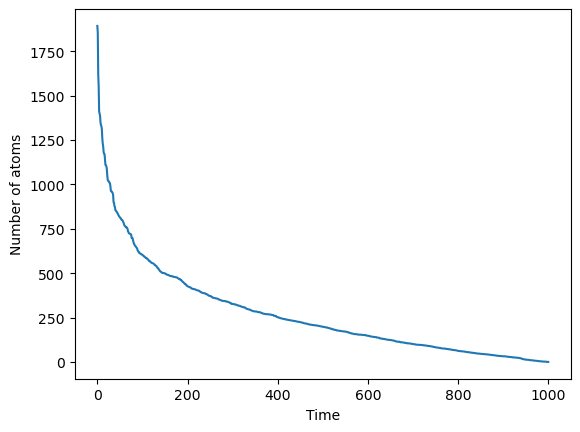

In [13]:
import math

T = 3.052*60
def p2(t):
    return 2**(-t/T)*math.log(2)/T

def icdf_p2(t):
    return -T*np.log(1-t)/np.log(2)


# apply the inverse of the CDF
decay_time = icdf_p2(np.random.random(1000))
x = np.linspace(0,N,N)
plt.plot(x, np.sort(decay_time)[::-1]) 
plt.xlabel('Time')
plt.ylabel('Number of atoms')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

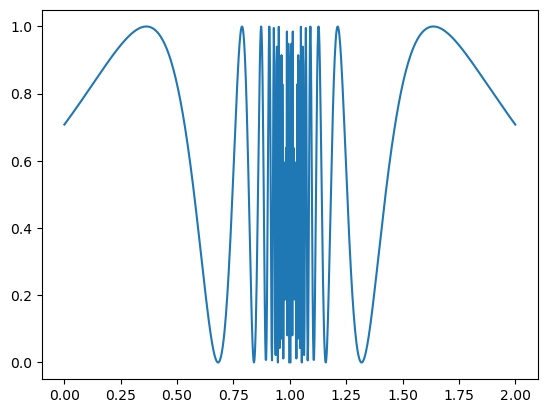

In [14]:
def f(x):
    return np.sin(1/(1-x))**2
x = np.linspace(0,2, 1000)
plt.plot(x,f(x))

In [22]:
# Hit/miss method
N = 10000

count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): 
        count += 1
I = 2 * count / N

I_true = stats.norm().cdf(2) - stats.norm().cdf(0)

#error = (2-0)*np.sqrt()

print("Hit/miss integral:", I, ", rel. err:",error)

# Mean value method
x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()  
    y[i] = f(x[i])  

# Calculation of the result
I2 = ((2-(0))*np.sum(y))/N

I2_true = stats.norm().cdf(2) - stats.norm().cdf(0)

error2 = np.abs(I2-I2_true)/I2_true

print("Mean value integral:", I2, ", rel. err:",error2)


Hit/miss integral: 1.3626 , rel. err: 1.8551081754349403
Mean value integral: 1.3535392151569237 , rel. err: 1.8361227645430245


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [24]:
def f(params):
    sol = 0
    for p in params:
        sol += p**2
    if sol <= 1:
        return 1
    else:
        return 0
    
N = 1000000
count = 0

for i in range(N):
    x = np.random.random()
    y = np.random.random()
    if f([x,y])==1: 
        count += 1
        
I_1 = 2**2 * (count / N)
print("circle:", I_1)

dim = 10 
count = 0
a = -1
b = 1

for i in range(N):
    params = []
    for i in range(dim):
        params.append(np.random.random())
    
    if (f(params)==1):
        count += 1
        
I_2 = 2**dim*count/N

print("10D volume:", I_2)

circle: 3.143512
10D volume: 2.612224


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [26]:
def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)

def weight(x):
    return 1/np.sqrt(x)

N=10000
w_int = 2
x = np.random.random(N)**2
h_is = 1.0 / N * np.sum(f(x) / (weight(x)) * w_int)

print("Importance sampling Integral :", h_is)
# We have a result around 0.84 as expected.

Importance sampling Integral : 0.7601606337167628
